# OpenAI Retro-Gym library exploration

This notebook will be used to explore the different configurations of some of the libraries to use, this will help us to explore and get familiar with the outputs, and, to check if the game integration procedure was done successfully.

In [1]:
# To help us call the retro and time libraries
import retro
import time

A regular used method from __Retro-Gym__ library is __make__, which creates an instance of an "GYM" object, the RL enviroment.

In [2]:
env = retro.make(game='Mtpo-Nes'
                 ,state='KingHippo.state'
                )

Retro Gym supports two types of environment objects "rendering":

* "human" which basically is watching the game in real time.
* "rgb_array" which is like a "picture" of a frame of the game.

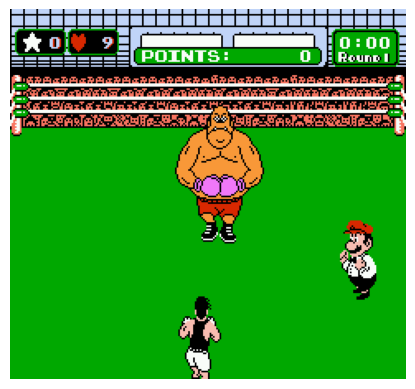

In [3]:
import matplotlib.pyplot as plt 
env.reset()
env_screen = env.render(mode='rgb_array')
env.close()
plt.imshow(env_screen)
plt.axis('off')
plt.show()

The “Env” object created using the “make” method is like the heart of the project, because it’s the object that will allow us to train our RL agent.

Now we’ll explore a little this object and its main features.

We'll start with two of its main attributes:
* The __Observation Space__.
* The __Action Space__.

In [4]:
obs_space = env.observation_space
action_space = env.action_space
print("The observation space: {}".format(obs_space))
print("The action space: {}".format(action_space))

The observation space: Box([[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]], [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]


We see that the __Observation Space__ is made from a __Box__ object, that contains the picture of a frame of the game, and which dimensions are 224 pixels wide, 240 pixels tall and has three (3) color channels.
The __Action Space__ is made from a __Multibinary__ object, with a length of nine (9).

In [5]:
accion = env.action_space.sample()
print('The action in vector format is {}'.format(accion))
print('The action in "human" format is {}'.format(env.get_action_meaning(accion)))

La acción en formato "vector" es [0 1 1 1 0 0 0 1 1]
La acción en formato "humano" es ['RIGHT', 'A']


In [6]:
env.get_action_meaning([1,1,1])

['B']

A simple inspection of the action space tells us that most of the actions that can be performed are not necessary, nor meaningful, so it is recommended to reduce the action space. The latter help reduce the process time by some important margin.

## Initial Test

We’ll make an initial test to verify that the “Punch-Out!” game works correctly after the initial integration (the game doesn´t come bundled with the Gym-Retro library). As we must yet train an RL agent, we’ll use random actions to make the test.

In [2]:
import retro
import time
import os
from stable_baselines3.common.vec_env import VecVideoRecorder, DummyVecEnv
from stable_baselines3.common.monitor import Monitor

Create the gym environment:

In [8]:
env = retro.make('Mtpo-Nes'
                 ,state='GlassJoe.state'
                )

In [10]:
env = Monitor(env)
env = DummyVecEnv([lambda: env])

And finally we create a short loop to test the game:

In [ ]:
VELOCIDAD = 0.01
GAMES = 1

for game in range(GAMES): 
    obs = env.reset()
    done = False
    while not done: 
        if done:
            obs = env.reset()
        action = [env.action_space.sample()]
        obs, reward, done, info = env.step(action)
        env.render()
        time.sleep(VELOCIDAD)
env.close()

C:\Users\armedina\Documents\DS-Projects\rl_ai\lib\site-packages\pyglet\image\codecs\wic.py:289: UserWarning: [WinError -2147417850] No se puede cambiar el modo de subproceso después de establecerlo
  warnings.warn(str(err))


Saving video to C:\Users\armedina\Documents\DS-Projects\UDD_Capstone_Punch-Out\video_gifs\random_agent_30k_steps-step-0-to-step-200.mp4


The integration was a success, the game runs correctly.

This was extracted from the following tutorial:

https://blog.paperspace.com/getting-started-with-openai-gym/